In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df=pd.read_csv('dim_players.csv')
df.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [4]:
df1=pd.read_csv('dim_match_summary.csv')
df1

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942
...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853


In [5]:
df2=pd.read_csv('fact_bating_summary.csv')
df2

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
...,...,...,...,...,...,...,...,...,...,...,...
3263,T201566,Super Kings Vs Titans,Titans,3,SaiSudharsan,out,22,17,3,0,129.41
3264,T201566,Super Kings Vs Titans,Titans,4,HardikPandya,out,8,11,0,0,72.72
3265,T201566,Super Kings Vs Titans,Titans,5,VijayShankar,out,27,21,2,1,128.57
3266,T201566,Super Kings Vs Titans,Titans,6,RahulTewatia,not_out,15,14,1,1,107.14


# outlier detection 

In [6]:
df2.isna().sum()

match_id       0
match          0
teamInnings    0
battingPos     0
batsmanName    0
out/not_out    0
runs           0
balls          0
4s             0
6s             0
SR             0
dtype: int64

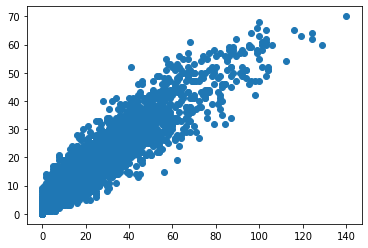

In [7]:
plt.scatter(df2.runs,df2.balls)

In [8]:
df3=pd.read_csv('fact_bowling_summary.csv')
df3

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.00,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.00,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.00,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.50,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.50,6,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,T201566,Super Kings Vs Titans,Super Kings,DeepakChahar,4.0,0,29,0,7.25,9,1,2,0,0
2432,T201566,Super Kings Vs Titans,Super Kings,TusharDeshpande,3.2,0,51,1,15.30,5,4,4,1,1
2433,T201566,Super Kings Vs Titans,Super Kings,RajvardhanHangargekar,4.0,0,36,3,9.00,10,4,1,3,1
2434,T201566,Super Kings Vs Titans,Super Kings,MitchellSantner,4.0,0,32,0,8.00,7,5,0,0,0


. Top 10 batsmen based on past 3 years total runs scored.
2. Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in
each season)
3. Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each
season)
4. Top 10 bowlers based on past 3 years total wickets taken.
5. Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in
each season)
6. Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in
each season)
7. Top 5 batsmen based on past 3 years boundary % (fours and sixes).
8. Top 5 bowlers based on past 3 years dot ball %.
9. Top 4 teams based on past 3 years winning %.

10.Top 2 teams with the highest number of wins achieved by chasing targets over
the past 3 years.

# Top 10 batsmen

In [9]:
df2=pd.read_csv('fact_bating_summary.csv')
df2.head(24)


,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25
6,T203817,Super Kings Vs KKR,KKR,3,NitishRana,out,0,1,0,0,0.00
7,T203817,Super Kings Vs KKR,KKR,4,SunilNarine,out,2,2,0,0,100.00
8,T203817,Super Kings Vs KKR,KKR,5,EoinMorgan,out,4,8,0,0,50.00
9,T203817,Super Kings Vs KKR,KKR,6,DineshKarthik,out,9,7,0,1,128.57


In [10]:
a=df2.groupby('batsmanName')['runs'].sum().reset_index()
a

,batsmanName,runs
0,ABdeVilliers,313
1,AaronFinch,86
2,AbdulBasith,1
3,AbdulSamad,284
4,AbhijeetTomar,4
...,...,...
259,YashDayal,0
260,YashDhull,16
261,YashasviJaiswal,1132
262,YudhvirSingh,1


In [11]:
answer_1=a.nlargest(10,'runs',keep='all').reset_index(drop=True)
answer_1

,batsmanName,runs
0,ShubmanGill,1851
1,FafduPlessis,1831
2,RuturajGaikwad,1593
3,KLRahul,1516
4,JosButtler,1509
5,ShikharDhawan,1392
6,ViratKohli,1385
7,SanjuSamson,1304
8,SuryakumarYadav,1225
9,GlennMaxwell,1214


([<matplotlib.patches.Wedge at 0x1695150>,
 [Text(1.524601932861887, 0.6309429025781959, 'ShubmanGill'),
  Text(0.6393362318795168, 1.5211013058327514, 'FafduPlessis'),
  Text(-0.5314514228941479, 1.5620689437741813, 'RuturajGaikwad'),
  Text(-1.376715453574158, 0.9094803790572401, 'KLRahul'),
  Text(-1.647278072802876, -0.09473621727113167, 'JosButtler'),
  Text(-1.290831560394316, -1.0277421284981834, 'ShikharDhawan'),
  Text(-0.5028873003842501, -1.571497490647771, 'ViratKohli'),
  Text(0.4246859761419142, -1.5944095526772253, 'SanjuSamson'),
  Text(1.1795160113166105, -1.1537946000253918, 'SuryakumarYadav'),
  Text(1.5956628943909805, -0.41995229189016076, 'GlennMaxwell')],
 [Text(0.8316010542883018, 0.3441506741335613, '12.5%'),
  Text(0.34872885375246365, 0.8296916213633188, '12.4%'),
  Text(-0.2898825943058988, 0.8520376056950077, '10.7%'),
  Text(-0.7509357019495406, 0.4960802067584945, '10.2%'),
  Text(-0.8985153124379323, -0.05167430032970818, '10.2%'),
  Text(-0.704089942033

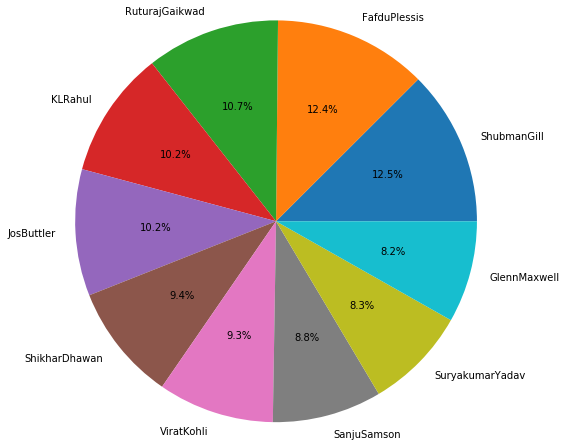

In [110]:
plt.figure(figsize=(6,7))
plt.pie(answer_1.runs,labels=answer_1.batsmanName,autopct='%0.1f%%',radius=1.5)

<BarContainer object of 10 artists>

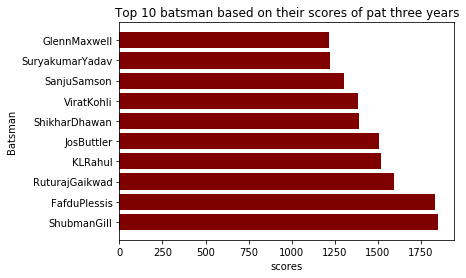

In [112]:
xpos=np.arange(len(answer_1.batsmanName))
plt.yticks(xpos,answer_1.batsmanName)
plt.title('Top 10 batsman based on their scores of pat three years')
plt.xlabel('scores')
plt.ylabel('Batsman')
plt.barh(xpos,answer_1.runs,color='maroon')

# Top 10 batsman by average score 

In [13]:
ques_2=pd.merge(df1,df2,on='match_id',how='inner')
ques_2

,team1,team2,winner,margin,matchDate,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,Super Kings,Titans,Titans,5 wickets,"Mar 31, 2023",T201566,Super Kings Vs Titans,Titans,3,SaiSudharsan,out,22,17,3,0,129.41
3264,Super Kings,Titans,Titans,5 wickets,"Mar 31, 2023",T201566,Super Kings Vs Titans,Titans,4,HardikPandya,out,8,11,0,0,72.72
3265,Super Kings,Titans,Titans,5 wickets,"Mar 31, 2023",T201566,Super Kings Vs Titans,Titans,5,VijayShankar,out,27,21,2,1,128.57
3266,Super Kings,Titans,Titans,5 wickets,"Mar 31, 2023",T201566,Super Kings Vs Titans,Titans,6,RahulTewatia,not_out,15,14,1,1,107.14


In [14]:
ques_2['matchDate']=pd.DatetimeIndex(ques_2['matchDate'])

In [15]:
ques_2['season'] = ques_2['matchDate'].dt.year # converting dates into season 

In [16]:
ques_2.season.value_counts()#here there is an outlier 2029

2022    1176
2023    1161
2021     919
2029      12
Name: season, dtype: int64

In [17]:
ques_2=ques_2[ques_2['season'].isin(['2021','2022','2023'])]
batsman_data=ques_2[ques_2['season'].isin(['2021','2022','2023'])]
ques_2.head()


,team1,team2,winner,margin,matchDate,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,2021
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,2021
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,2021


In [18]:
a1=ques_2.groupby(['season','batsmanName'])['balls'].sum()
b1=a1.reset_index()

In [19]:
c1=b1[['season','batsmanName','balls']][b1['balls']>=60]
d1=c1.merge(a,on='batsmanName',how='inner')

In [20]:
d1['batsman_count']=d1.batsmanName.map(d1.batsmanName.value_counts())
d1

,season,batsmanName,balls,runs,batsman_count
0,2021,ABdeVilliers,211,313,1
1,2021,AbdulSamad,87,284,2
2,2023,AbdulSamad,128,284,2
3,2021,AbhishekSharma,69,745,3
4,2022,AbhishekSharma,320,745,3
...,...,...,...,...,...
213,2023,RahmanullahGurbaz,170,227,1
214,2023,RileeRossouw,141,209,1
215,2023,SamCurran,203,332,1
216,2023,SikandarRaza,98,139,1


In [21]:
d1=d1[d1['batsman_count']==3]  #minimum 60 balls faced on each season
d1

,season,batsmanName,balls,runs,batsman_count
3,2021,AbhishekSharma,69,745,3
4,2022,AbhishekSharma,320,745,3
5,2023,AbhishekSharma,157,745,3
6,2021,AidenMarkram,119,775,3
7,2022,AidenMarkram,274,775,3
...,...,...,...,...,...
152,2022,WriddhimanSaha,259,819,3
153,2023,WriddhimanSaha,248,819,3
154,2021,YashasviJaiswal,168,1132,3
155,2022,YashasviJaiswal,194,1132,3


In [22]:
ques_2['out/not_out_no']=ques_2['out/not_out'].apply(lambda x:1 if x=='out' else 0)

In [23]:
ques_2['out/not_out_no'].describe()

count    3256.000000
mean        0.773342
std         0.418734
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: out/not_out_no, dtype: float64

In [24]:
def func1(x):
    mean=0.788710
    std=0.408288
    return (x-mean)/std

In [25]:
ques_2['z_score_2']=ques_2['out/not_out_no'].apply(lambda x: func1(x))
ques_2=ques_2[(ques_2['z_score_2']>=-1)&(ques_2['z_score_2']<=1)]
ques_2

,team1,team2,winner,margin,matchDate,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,season,out/not_out_no,z_score_2
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021,1,0.517502
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021,1,0.517502
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,2021,1,0.517502
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,2021,1,0.517502
5,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25,2021,1,0.517502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Super Kings Vs Titans,Titans,1,WriddhimanSaha,out,25,16,2,2,156.25,2023,1,0.517502
3262,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Super Kings Vs Titans,Titans,2,ShubmanGill,out,63,36,6,3,175.00,2023,1,0.517502
3263,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Super Kings Vs Titans,Titans,3,SaiSudharsan,out,22,17,3,0,129.41,2023,1,0.517502
3264,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Super Kings Vs Titans,Titans,4,HardikPandya,out,8,11,0,0,72.72,2023,1,0.517502


In [26]:
e1=ques_2.groupby('batsmanName')['out/not_out_no'].sum().reset_index()
e1

,batsmanName,out/not_out_no
0,ABdeVilliers,10
1,AaronFinch,5
2,AbdulSamad,15
3,AbhijeetTomar,1
4,AbhinavManohar,12
...,...,...
234,YashDayal,1
235,YashDhull,3
236,YashasviJaiswal,33
237,YudhvirSingh,2


In [27]:
d2=d1.merge(e1,on='batsmanName',how='inner')
d2.drop(['season','balls'],axis=1,inplace=True)
d2

,batsmanName,runs,batsman_count,out/not_out_no
0,AbhishekSharma,745,3,30
1,AbhishekSharma,745,3,30
2,AbhishekSharma,745,3,30
3,AidenMarkram,775,3,24
4,AidenMarkram,775,3,24
...,...,...,...,...
115,WriddhimanSaha,819,3,34
116,WriddhimanSaha,819,3,34
117,YashasviJaiswal,1132,3,33
118,YashasviJaiswal,1132,3,33


In [28]:

def formula(x,y):
    return x/y

In [29]:
d2['batting_average']=d2.apply(lambda x: formula(x['runs'],x['out/not_out_no']),axis=1)

In [30]:
d2.drop_duplicates(inplace=True)

In [31]:
d2.describe()

,runs,batsman_count,out/not_out_no,batting_average
count,40.000000,40.0,40.000000,40.000000
mean,983.475000,3.0,31.850000,30.589664
std,362.781632,0.0,6.900576,7.916342
min,354.000000,3.0,17.000000,14.160000
25%,728.000000,3.0,28.000000,24.812500
50%,942.500000,3.0,31.500000,29.873874
75%,1171.250000,3.0,36.250000,34.764286
max,1851.000000,3.0,45.000000,50.533333


In [100]:
insights_2=d2.nlargest(10,'batting_average',keep='all').reset_index(drop=True)
insights_2

,batsmanName,runs,batsman_count,out/not_out_no,batting_average
0,KLRahul,1516,3,30,50.533333
1,FafduPlessis,1831,3,42,43.595238
2,DavidMiller,864,3,20,43.200000
3,JosButtler,1509,3,36,41.916667
4,ShubmanGill,1851,3,45,41.133333
5,ShimronHetmyer,854,3,21,40.666667
6,ShikharDhawan,1392,3,35,39.771429
7,RuturajGaikwad,1593,3,41,38.853659
8,DavidWarner,1137,3,30,37.900000
9,SuryakumarYadav,1225,3,35,35.000000


<BarContainer object of 10 artists>

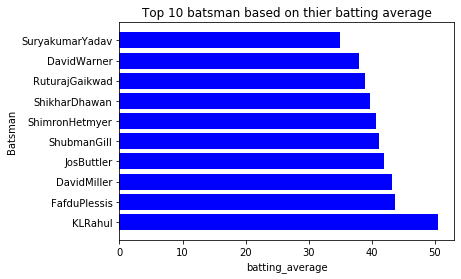

In [121]:
xpos=np.arange(len(insights_2))
plt.yticks(xpos,insights_2.batsmanName)
plt.xlabel('batting_average')
plt.ylabel('Batsman')
plt.title('Top 10 batsman based on thier batting average')
plt.barh(xpos,insights_2.batting_average, color ='blue')


([<matplotlib.patches.Wedge at 0xdf4cf0>,
 [Text(1.5293441865202435, 0.6193596363638292, 'KLRahul'),
  Text(0.7461465184610736, 1.4716539583028405, 'FafduPlessis'),
  Text(-0.31433350552762906, 1.6197822221838072, 'DavidMiller'),
  Text(-1.2284554438431667, 1.1015431096839055, 'JosButtler'),
  Text(-1.6419885514354315, 0.16239949801330592, 'ShubmanGill'),
  Text(-1.4283650003018542, -0.825998441834296, 'ShimronHetmyer'),
  Text(-0.693812499930036, -1.4970384814495699, 'ShikharDhawan'),
  Text(0.2705560570318989, -1.6276668639507754, 'RuturajGaikwad'),
  Text(1.123704026070906, -1.2082173901215116, 'DavidWarner'),
  Text(1.591746630279206, -0.43456031226377895, 'SuryakumarYadav')],
 [Text(0.8341877381019509, 0.33783252892572496, '12.2%'),
  Text(0.40698901006967647, 0.8027203408924584, '10.6%'),
  Text(-0.17145463937870675, 0.8835175757366219, '10.5%'),
  Text(-0.6700666057326362, 0.6008416961912211, '10.2%'),
  Text(-0.8956301189647807, 0.08858154437089412, '10.0%'),
  Text(-0.77910818

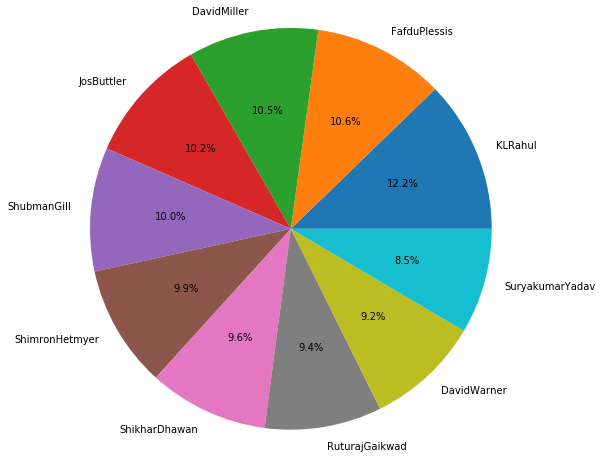

In [113]:
plt.figure(figsize=(6,7))
plt.pie(insights_2.batting_average,labels=insights_2.batsmanName,autopct='%0.1f%%',radius=1.5)

# Top 10 batsmen based on past 3 years strike rate 

In [33]:
ques_2.head()

,team1,team2,winner,margin,matchDate,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,season,out/not_out_no,z_score_2
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021,1,0.517502
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021,1,0.517502
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,2021,1,0.517502
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,2021,1,0.517502
5,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25,2021,1,0.517502


In [34]:
d1# player who plays more than 60 balls 

,season,batsmanName,balls,runs,batsman_count
3,2021,AbhishekSharma,69,745,3
4,2022,AbhishekSharma,320,745,3
5,2023,AbhishekSharma,157,745,3
6,2021,AidenMarkram,119,775,3
7,2022,AidenMarkram,274,775,3
...,...,...,...,...,...
152,2022,WriddhimanSaha,259,819,3
153,2023,WriddhimanSaha,248,819,3
154,2021,YashasviJaiswal,168,1132,3
155,2022,YashasviJaiswal,194,1132,3


In [35]:
a2=ques_2[~ques_2.SR.str.contains('-')]
ques_2['SR']=a2['SR'].astype(float)

In [36]:
ques_2['SR'].describe()

count    2508.000000
mean      105.678604
std        62.874346
min         0.000000
25%        60.000000
50%       110.000000
75%       146.660000
max       400.000000
Name: SR, dtype: float64

In [37]:
std=70.6
mean=114.3
def func(x):
    std=70.6
    mean=114.3
    return (x-mean)/std
ques_2['z_score']=ques_2['SR'].apply(lambda x: func(x))# outlier detection using z_score



In [38]:
ques_2=ques_2[(ques_2['z_score']<=3) & (ques_2['z_score']>=-3)]  

In [117]:
g1=ques_2.groupby('batsmanName')['SR'].mean().reset_index()
ques_3=pd.merge(g1,d1,on='batsmanName',how='inner')
ques_3


,batsmanName,SR,season,balls,runs,batsman_count
0,AbhishekSharma,113.021333,2021,69,745,3
1,AbhishekSharma,113.021333,2022,320,745,3
2,AbhishekSharma,113.021333,2023,157,745,3
3,AidenMarkram,111.907500,2021,119,775,3
4,AidenMarkram,111.907500,2022,274,775,3
...,...,...,...,...,...,...
115,WriddhimanSaha,97.048824,2022,259,819,3
116,WriddhimanSaha,97.048824,2023,248,819,3
117,YashasviJaiswal,125.448485,2021,168,1132,3
118,YashasviJaiswal,125.448485,2022,194,1132,3


In [118]:
ques_3.drop(['season','balls','runs'],axis=1,inplace=True)


In [119]:
ques_3.drop_duplicates('batsmanName',inplace=True)

In [120]:
data3=ques_3.nlargest(10,'SR',keep='all').reset_index()
data3.drop(['index','batsman_count'],axis=1,inplace=True)
data3

,batsmanName,SR
0,SuryakumarYadav,134.931714
1,GlennMaxwell,133.153429
2,ShimronHetmyer,127.957143
3,PrithviShaw,126.306563
4,YashasviJaiswal,125.448485
5,RahulTripathi,124.209474
6,FafduPlessis,123.090238
7,ShivamDube,122.239310
8,SanjuSamson,121.312250
9,AndreRussell,120.164074


<BarContainer object of 10 artists>

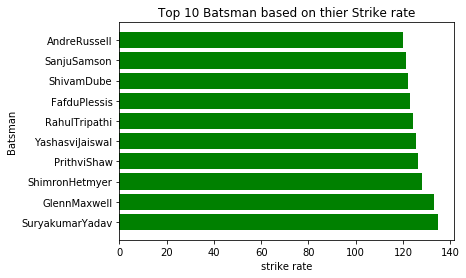

In [124]:
xpos=np.arange(len(data3.batsmanName))
plt.yticks(xpos,data3.batsmanName)
plt.title('Top 10 Batsman based on thier Strike rate')
plt.xlabel('strike rate')
plt.ylabel('Batsman')
plt.barh(xpos,data3.SR,color='green')

([<matplotlib.patches.Wedge at 0x9819d10>,
 [Text(2.0764364598891785, 0.7269192720260595, 'SuryakumarYadav'),
  Text(1.1779065842217034, 1.8581001261630545, 'GlennMaxwell'),
  Text(-0.1903972765332656, 2.191745623262133, 'ShimronHetmyer'),
  Text(-1.4526518586451236, 1.652211420362076, 'PrithviShaw'),
  Text(-2.1463565102868336, 0.4828599494152793, 'YashasviJaiswal'),
  Text(-2.0248035489579617, -0.8603316733256098, 'RahulTripathi'),
  Text(-1.1533473650318784, -1.8734433152817898, 'FafduPlessis'),
  Text(0.13286753612457344, -2.1959841114735292, 'ShivamDube'),
  Text(1.3631625860002774, -1.7267853845018024, 'SanjuSamson'),
  Text(2.101810963956846, -0.6499158959363852, 'AndreRussell')],
 [Text(1.1326017053940973, 0.3965014211051233, '10.7%'),
  Text(0.6424945004845655, 1.0135091597253023, '10.6%'),
  Text(-0.10385305992723577, 1.195497612688436, '10.2%'),
  Text(-0.7923555592609764, 0.9012062292884049, '10.0%'),
  Text(-1.170739914701909, 0.26337815422651595, '10.0%'),
  Text(-1.10443

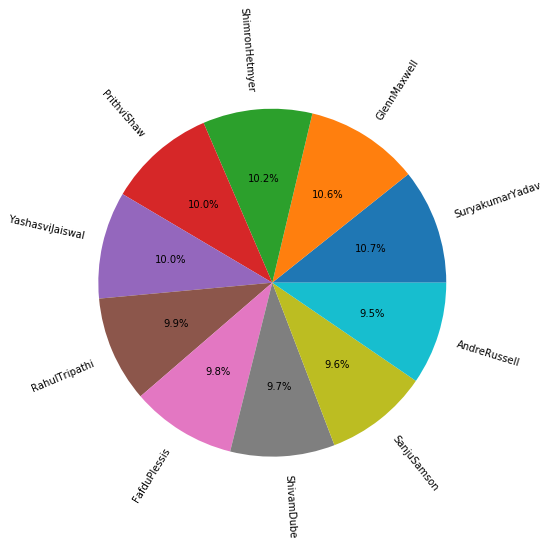

In [126]:
plt.pie(data3.SR,labels=data3.batsmanName,autopct='%0.1f%%',rotatelabels='True',radius=2)

# Top 10 bowlers based on past 3 years total wickets taken

In [43]:
df3.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [44]:
ques_4=df3.groupby('bowlerName')['wickets'].sum().reset_index()
ques_4


,bowlerName,wickets
0,AbdulSamad,1
1,AbhishekSharma,6
2,AdamMilne,3
3,AdamZampa,8
4,AdilRashid,2
...,...,...
197,YashDayal,13
198,YashThakur,13
199,YashasviJaiswal,0
200,YudhvirSingh,3


In [132]:
ques_4=ques_4.nlargest(10,'wickets',keep='all')
insights_4=ques_4.reset_index(drop=True)
insights_4






,bowlerName,wickets
0,MohammedShami,67
1,YuzvendraChahal,66
2,HarshalPatel,65
3,RashidKhan,63
4,AveshKhan,47
5,ArshdeepSingh,45
6,KagisoRabada,45
7,VarunChakravarthy,44
8,ShardulThakur,43
9,TrentBoult,42


<BarContainer object of 10 artists>

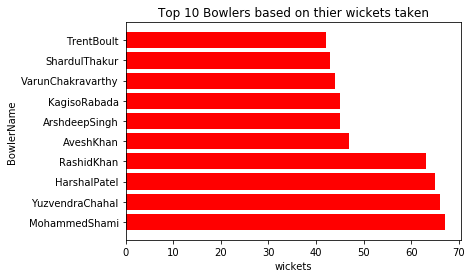

In [135]:
xpos=np.arange(len(insights_4.bowlerName))
plt.yticks(xpos,insights_4.bowlerName)
plt.title('Top 10 Bowlers based on thier wickets taken')
plt.xlabel('wickets')
plt.ylabel('BowlerName')

plt.barh(xpos,insights_4.wickets,color='red')


([<matplotlib.patches.Wedge at 0xa071930>,
 [Text(2.0268431322645215, 0.8555155855927719, 'MohammedShami'),
  Text(0.8130434003463801, 2.044250578856026, 'YuzvendraChahal'),
  Text(-0.8615531430584135, 2.024284115850878, 'HarshalPatel'),
  Text(-2.0217072366601476, 0.8675827621823704, 'RashidKhan'),
  Text(-2.1314037903864946, -0.5450852064825146, 'AveshKhan'),
  Text(-1.5346299645877677, -1.57636000703816, 'ArshdeepSingh'),
  Text(-0.51326080664368, -2.139290383366288, 'KagisoRabada'),
  Text(0.6398029337605209, -2.1049114484822, 'VarunChakravarthy'),
  Text(1.5990550063273143, -1.5109675995002518, 'ShardulThakur'),
  Text(2.1314038796969457, -0.5450848572587651, 'TrentBoult')],
 [Text(1.1055507994170117, 0.46664486486878454, '12.7%'),
  Text(0.4434782183707528, 1.1150457702851049, '12.5%'),
  Text(-0.46993807803186183, 1.104154972282297, '12.3%'),
  Text(-1.1027494018146258, 0.4732269611903838, '12.0%'),
  Text(-1.1625838856653605, -0.297319203535917, '8.9%'),
  Text(-0.8370708897751

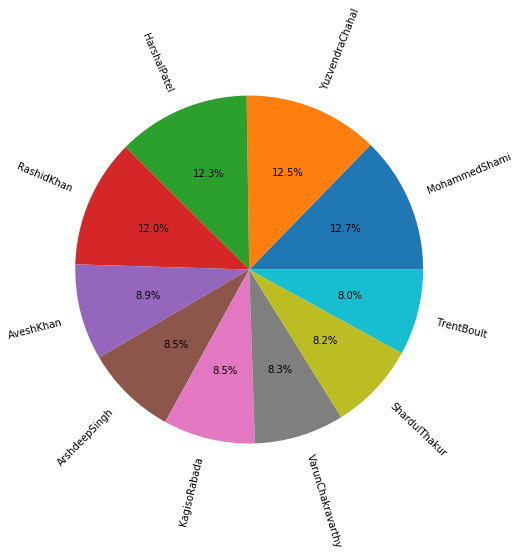

In [137]:
plt.pie(insights_4.wickets,labels=insights_4.bowlerName,autopct='%0.1f%%',radius=2,rotatelabels=True)

# Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [46]:
insight_5=pd.merge(df3,df1,on='match_id',how='inner')
insight_5['matchDate']=pd.DatetimeIndex(insight_5['matchDate'])
insight_5['season']=insight_5.matchDate.dt.year
insight_5.season.value_counts()


2023    881
2022    857
2021    687
2029     11
Name: season, dtype: int64

In [47]:
insight_5=insight_5[insight_5['season'].isin(['2021','2022','2023'])]

In [48]:
insight_5.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021


In [49]:
def func3(x,y,z):
    return (x*6)+y+z

In [50]:
insight_5['balls_bowled']=insight_5.apply(lambda x: func3(x['overs'],x['wides'],x['noBalls']),axis=1)

In [51]:
g5=insight_5.groupby(['season','bowlerName'])['balls_bowled'].sum().reset_index()
g5=g5[g5['balls_bowled']>=60]

g5

,season,bowlerName,balls_bowled
2,2021,AdamMilne,87.0
6,2021,AmitMishra,60.0
7,2021,AndreRussell,122.0
8,2021,AnrichNortje,186.2
9,2021,ArshdeepSingh,259.8
...,...,...,...
365,2023,WashingtonSundar,104.4
366,2023,WayneParnell,156.6
367,2023,YashDayal,88.0
368,2023,YashThakur,205.0


In [52]:
g5['bowler_count']=g5['bowlerName'].map(g5.bowlerName.value_counts())
g5


,season,bowlerName,balls_bowled,bowler_count
2,2021,AdamMilne,87.0,1
6,2021,AmitMishra,60.0,2
7,2021,AndreRussell,122.0,3
8,2021,AnrichNortje,186.2,3
9,2021,ArshdeepSingh,259.8,3
...,...,...,...,...
365,2023,WashingtonSundar,104.4,3
366,2023,WayneParnell,156.6,1
367,2023,YashDayal,88.0,2
368,2023,YashThakur,205.0,1


In [53]:
g5=g5[g5['bowler_count']==3]

In [54]:
a5=insight_5.groupby('bowlerName')[['runs','wickets']].sum().reset_index()
a5

,bowlerName,runs,wickets
0,AbdulSamad,17,1
1,AbhishekSharma,212,6
2,AdamMilne,150,3
3,AdamZampa,188,8
4,AdilRashid,91,2
...,...,...,...
197,YashDayal,461,13
198,YashThakur,289,13
199,YashasviJaiswal,6,0
200,YudhvirSingh,70,3


In [55]:
insights_5=pd.merge(g5,a5,on='bowlerName',how='inner')
insights_5.head()

,season,bowlerName,balls_bowled,bowler_count,runs,wickets
0,2021,AndreRussell,122.0,3,638,35
1,2022,AndreRussell,173.2,3,638,35
2,2023,AndreRussell,98.6,3,638,35
3,2021,AnrichNortje,186.2,3,768,31
4,2022,AnrichNortje,142.2,3,768,31


In [56]:
def func5(x,y):
    return x/y
insights_5['bowling_average']=insights_5.apply(lambda x: func5(x['runs'],x['wickets']),axis=1)

In [57]:
insights_5.drop('season',axis=1,inplace=True)

In [58]:
insights_1=insights_5.groupby('bowlerName')['balls_bowled'].mean()
insights_1=insights_1.reset_index()
final=insights_1.merge(insights_5,on='bowlerName',how='inner')
final.head()
final.drop(['balls_bowled_y','runs','wickets','bowler_count',],axis=1,inplace=True)



In [139]:
final.drop_duplicates('bowlerName',inplace=True)
insights_5=final.nsmallest(10,'bowling_average',keep='all').reset_index(drop=True)
insights_5.drop('balls_bowled_x',axis=1,inplace=True)

In [140]:
insights_5

,bowlerName,bowling_average
0,AndreRussell,18.228571
1,YuzvendraChahal,20.196970
2,RashidKhan,20.206349
3,HarshalPatel,20.353846
4,MohammedShami,20.537313
5,AveshKhan,23.723404
6,KagisoRabada,23.755556
7,MoeenAli,23.857143
8,AnrichNortje,24.774194
9,UmranMalik,26.103448


<BarContainer object of 10 artists>

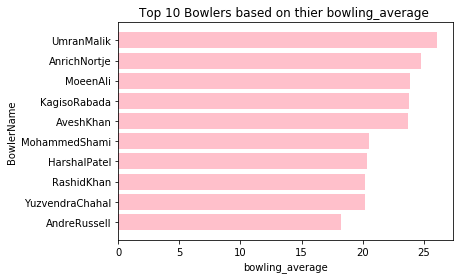

In [143]:
xpos=np.arange(len(insights_5.bowlerName))
plt.yticks(xpos,insights_5.bowlerName)
plt.title('Top 10 Bowlers based on thier bowling_average ')
plt.xlabel('bowling_average')
plt.ylabel('BowlerName')

plt.barh(xpos,insights_5.bowling_average,color='pink')

([<matplotlib.patches.Wedge at 0x184c690>,
 [Text(2.1270363122399294, 0.5618865778898465, 'AndreRussell'),
  Text(1.5285166172672386, 1.5822885169076844, 'YuzvendraChahal'),
  Text(0.4277442615900081, 2.158016414830253, 'RashidKhan'),
  Text(-0.8139528362626351, 2.0438886418638402, 'HarshalPatel'),
  Text(-1.8001201321876001, 1.26474009570856, 'MohammedShami'),
  Text(-2.1997645259399743, -0.03218742636621289, 'AveshKhan'),
  Text(-1.7004901946775628, -1.395827030045437, 'KagisoRabada'),
  Text(-0.4562351908118412, -2.152173192534672, 'MoeenAli'),
  Text(1.0161458788959157, -1.9512681908960765, 'AnrichNortje'),
  Text(2.0512495510745072, -0.7952202708788515, 'UmranMalik')],
 [Text(1.1602016248581433, 0.30648358793991626, '8.2%'),
  Text(0.8337363366912209, 0.8630664637678277, '9.1%'),
  Text(0.23331505177636802, 1.1770998626346836, '9.1%'),
  Text(-0.4439742743250737, 1.114848350107549, '9.2%'),
  Text(-0.9818837084659636, 0.6898582340228507, '9.3%'),
  Text(-1.1998715596036222, -0.017

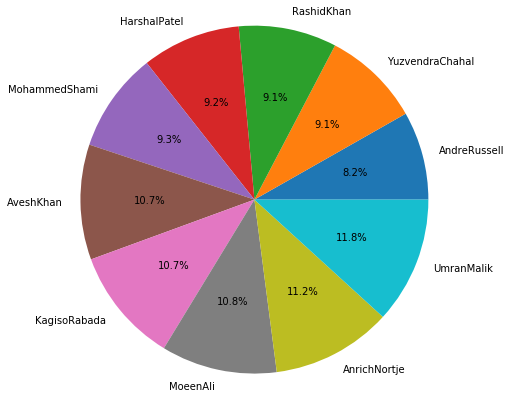

In [144]:
plt.pie(insights_5.bowling_average,labels=insights_5.bowlerName,autopct='%0.1f%%',radius=2)

# Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

In [60]:
a6=insight_5.groupby('bowlerName')['economy'].mean().reset_index()
insight_6=pd.merge(final,a6,on='bowlerName',how='inner')
insight_6.head()

,bowlerName,balls_bowled_x,bowling_average,economy
0,AndreRussell,131.266667,18.228571,10.614333
1,AnrichNortje,193.133333,24.774194,8.371667
2,ArshdeepSingh,299.600000,27.111111,8.704250
3,AveshKhan,276.800000,23.723404,8.483514
4,AxarPatel,268.000000,31.300000,7.248649


In [61]:
insight_6.drop(['balls_bowled_x','bowling_average'],axis=1,inplace=True)

In [62]:
ans_6=insight_6.nsmallest(10,'economy',keep='all')
ans_6.reset_index(inplace=True,drop=True)
ans_6




,bowlerName,economy
0,SunilNarine,6.724048
1,RashidKhan,7.078000
2,AxarPatel,7.248649
3,RavichandranAshwin,7.598095
4,RahulChahar,7.696842
5,YuzvendraChahal,7.742174
6,HarpreetBrar,7.765217
7,RaviBishnoi,7.777838
8,RavindraJadeja,7.782500
9,VarunChakravarthy,7.783571


<BarContainer object of 10 artists>

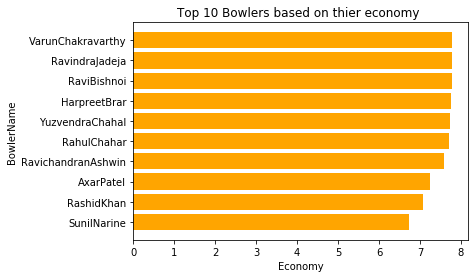

In [146]:
xpos=np.arange(len(ans_6.bowlerName))
plt.yticks(xpos,ans_6.bowlerName)
plt.title('Top 10 Bowlers based on thier economy ')
plt.xlabel('Economy')
plt.ylabel('BowlerName')

plt.barh(xpos,ans_6.economy,color='orange')

([<matplotlib.patches.Wedge at 0xab8cb90>,
 [Text(2.113762558430123, 0.6099244597316478, 'SunilNarine'),
  Text(1.4394538567193127, 1.6637225112307332, 'RashidKhan'),
  Text(0.25181169078177545, 2.1855413225069946, 'AxarPatel'),
  Text(-1.0654525337268768, 1.924788533417367, 'RavichandranAshwin'),
  Text(-2.0031567730775843, 0.9095949331836669, 'RahulChahar'),
  Text(-2.147562304129884, -0.47746848050980684, 'YuzvendraChahal'),
  Text(-1.4242552088087927, -1.6767519495086396, 'HarpreetBrar'),
  Text(-0.12048290235497423, -2.1966984022027516, 'RaviBishnoi'),
  Text(1.2336486196497798, -1.8215683032036416, 'RavindraJadeja'),
  Text(2.0847028274982575, -0.702861381085041, 'VarunChakravarthy')],
 [Text(1.1529613955073397, 0.3326860689445351, '8.94%'),
  Text(0.785156649119625, 0.9074850061258544, '9.41%'),
  Text(0.13735183133551387, 1.1921134486401788, '9.64%'),
  Text(-0.5811559274873873, 1.049884654591291, '10.10%'),
  Text(-1.0926309671332277, 0.4961426908274546, '10.24%'),
  Text(-1.1

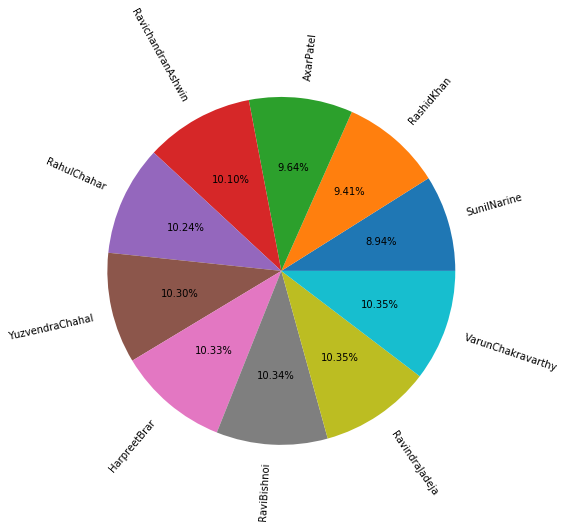

In [149]:
plt.pie(ans_6.economy,labels=ans_6.bowlerName,autopct='%0.2f%%',radius=2,rotatelabels=True)

# Top 5 batsmen based on past 3 years boundary %

In [63]:
batsman_data.head()

,team1,team2,winner,margin,matchDate,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,2021
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,2021
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,2021


In [64]:
ques_3.head()

,batsmanName,SR,batsman_count
0,AbhishekSharma,3390.64,3
3,AidenMarkram,2685.78,3
6,AmbatiRayudu,3073.73,3
9,AndreRussell,3244.43,3
12,DavidMiller,1952.09,3


In [65]:
batsman_data1= batsman_data.drop(batsman_data[(batsman_data.runs < 1)].index)
batsman_data1= batsman_data.drop(batsman_data[(batsman_data['4s'] < 1)].index)

In [66]:
def func7(x,y,z):
    formula=((y*4)+(z*6))/x
    return formula*100
        

In [67]:
batsman_data1['boundaries_percentage']=batsman_data1.apply(lambda x: func7(x['runs'],x['4s'],x['6s']),axis=1)

In [151]:
g7=batsman_data1.groupby('batsmanName')['boundaries_percentage'].mean()
ans_7=g7.reset_index()
ans_7





,batsmanName,boundaries_percentage
0,ABdeVilliers,65.411294
1,AaronFinch,55.665025
2,AbdulSamad,61.704472
3,AbhijeetTomar,100.000000
4,AbhinavManohar,73.868586
...,...,...
204,WaninduHasaranga,62.222222
205,WashingtonSundar,56.976190
206,WriddhimanSaha,65.557262
207,YashDhull,30.769231


In [161]:
insight_7=ans_7.merge(ques_3,on='batsmanName',how='inner')
insight_7.drop(['SR','batsman_count'],axis=1,inplace=True)

In [162]:
insights_7.head()

,batsmanName,boundaries_percentage
0,AbhishekSharma,62.204632
1,AidenMarkram,52.638907
2,AmbatiRayudu,64.386949
3,AndreRussell,75.956064
4,DavidMiller,55.755894


In [164]:
insights_7=insight_7.nlargest(5,'boundaries_percentage',keep='all').reset_index(drop=True)
insights_7

,batsmanName,boundaries_percentage
0,AndreRussell,75.956064
1,YashasviJaiswal,75.149303
2,MShahrukhKhan,70.805430
3,JosButtler,70.717510
4,GlennMaxwell,70.189739


<BarContainer object of 5 artists>

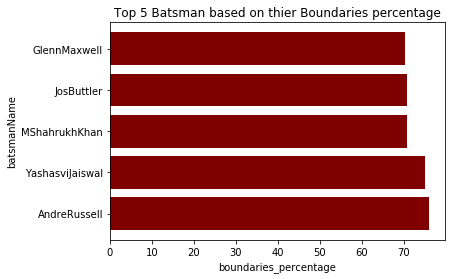

In [169]:
xpos=np.arange(len(insights_7.batsmanName))
plt.yticks(xpos,insights_7.batsmanName)
plt.title('Top 5 Batsman based on thier Boundaries percentage')
plt.xlabel('boundaries_percentage')
plt.ylabel('batsmanName')
plt.barh(xpos,insights_7.boundaries_percentage,color='maroon')

([<matplotlib.patches.Wedge at 0xbe6e7f0>,
 [Text(1.7410895927175498, 1.344844611890399, 'AndreRussell'),
  Text(-0.8471833250989108, 2.030339974899365, 'YashasviJaiswal'),
  Text(-2.1914281831598212, -0.19401679837799155, 'MShahrukhKhan'),
  Text(-0.5593327042195946, -2.1277093142603847, 'JosButtler'),
  Text(1.8060399986702027, -1.2562720737178452, 'GlennMaxwell')],
 [Text(0.9496852323913907, 0.7335516064856721, '20.94%'),
  Text(-0.46209999550849673, 1.1074581681269262, '20.71%'),
  Text(-1.1953244635417204, -0.10582734456981356, '19.52%'),
  Text(-0.30509056593796063, -1.1605687168693006, '19.49%'),
  Text(0.9851127265473831, -0.6852393129370064, '19.35%')])

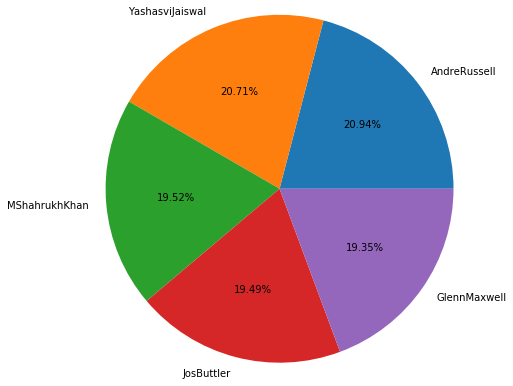

In [170]:
plt.pie(insights_7.boundaries_percentage,labels=insights_7.batsmanName,autopct='%0.2f%%',radius=2)

# Top 5 bowlers based on past 3 years dot ball %.

In [70]:
df3.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [71]:
insight_8=df3.groupby('bowlerName')['0s'].sum()
insight_8

bowlerName
AbdulSamad           2
AbhishekSharma      50
AdamMilne           40
AdamZampa           40
AdilRashid          20
                  ... 
YashDayal          100
YashThakur          70
YashasviJaiswal      0
YudhvirSingh        25
YuzvendraChahal    361
Name: 0s, Length: 202, dtype: int64

In [72]:
def func8(x,y,z):
    return (x*6)+y+z

In [73]:
df3['total_delivery']=df3.apply(lambda x: func8(x['overs'],x['wides'],x['noBalls']),axis=1)

In [74]:
df3.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_delivery
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,18.0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,24.0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,26.0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,25.0
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,25.0


In [75]:
df3=df3.merge(batsman_data[['season','match_id']],on='match_id',how='inner')

In [76]:
a8=df3.groupby(['season','bowlerName'])[['total_delivery','0s']].sum()
a8=a8.reset_index()
a8



,season,bowlerName,total_delivery,0s
0,2021,AbdulSamad,108.0,18
1,2021,AbhishekSharma,857.0,362
2,2021,AdamMilne,1520.0,549
3,2021,AdilRashid,306.0,102
4,2021,AidenMarkram,368.0,138
...,...,...,...,...
366,2023,WayneParnell,2424.8,909
367,2023,YashDayal,1480.0,425
368,2023,YashThakur,3406.0,1191
369,2023,YudhvirSingh,815.0,420


In [77]:
a8['elligile']=a8['bowlerName'].map(a8.bowlerName.value_counts()) #remove outliers that is player who not playing three season
a8

,season,bowlerName,total_delivery,0s,elligile
0,2021,AbdulSamad,108.0,18,2
1,2021,AbhishekSharma,857.0,362,3
2,2021,AdamMilne,1520.0,549,2
3,2021,AdilRashid,306.0,102,2
4,2021,AidenMarkram,368.0,138,3
...,...,...,...,...,...
366,2023,WayneParnell,2424.8,909,1
367,2023,YashDayal,1480.0,425,2
368,2023,YashThakur,3406.0,1191,1
369,2023,YudhvirSingh,815.0,420,1


In [78]:
data_8=a8[a8['elligile']==3]
data_8

,season,bowlerName,total_delivery,0s,elligile
1,2021,AbhishekSharma,857.0,362,3
4,2021,AidenMarkram,368.0,138,3
7,2021,AndreRussell,1923.0,620,3
8,2021,AnrichNortje,2872.8,1321,3
9,2021,ArshdeepSingh,3915.8,1347,3
...,...,...,...,...,...
359,2023,UmranMalik,1872.0,655,3
361,2023,VarunChakravarthy,5251.0,2091,3
364,2023,WaninduHasaranga,2960.0,954,3
365,2023,WashingtonSundar,1729.2,589,3


In [79]:
def func9(x,y):
    percentage=(x/y)*100
    return percentage
data_8['percentage(%)']=data_8.apply(lambda x:func9(x['0s'],x['total_delivery']),axis=1)

    
        


In [80]:
data_8.drop(['season','elligile'],inplace=True,axis=1)

In [81]:
g=data_8.groupby('bowlerName')[['total_delivery','0s','percentage(%)']].mean()
g.head()

,total_delivery,0s,percentage(%)
bowlerName,,,
AbhishekSharma,754.666667,246.000000,29.801858
AidenMarkram,580.866667,151.666667,27.676704
AndreRussell,2148.333333,723.000000,33.466387
AnrichNortje,3133.000000,1254.000000,39.919459
ArshdeepSingh,4742.933333,1662.000000,34.991777


In [174]:
insight_8=g.nlargest(5,'percentage(%)',keep='all').reset_index()
insight_8.drop(['0s','total_delivery'],axis=1,inplace=True)
insight_8

,bowlerName,percentage(%)
0,MohammedShami,47.393469
1,JoshHazlewood,45.794755
2,TrentBoult,45.206522
3,MohammedSiraj,45.171443
4,KagisoRabada,42.451869


<BarContainer object of 5 artists>

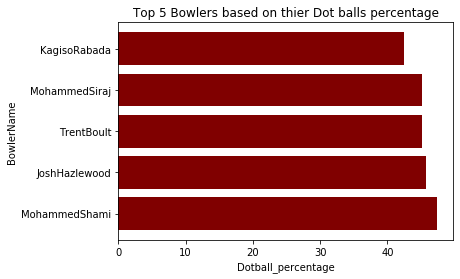

In [176]:
xpos=np.arange(len(insight_8.bowlerName))
plt.yticks(xpos,insight_8.bowlerName)
plt.title('Top 5 Bowlers based on thier Dot balls percentage')
plt.xlabel('Dotball_percentage')
plt.ylabel('BowlerName')
plt.barh(xpos,insight_8['percentage(%)'],color='maroon')

([<matplotlib.patches.Wedge at 0xbfea470>,
 [Text(1.7396582315121027, 1.3466956736888194, 'MohammedShami'),
  Text(-0.8226664666537454, 2.040396991921779, 'JoshHazlewood'),
  Text(-2.193421840070075, -0.17000185735340276, 'TrentBoult'),
  Text(-0.5169930681111436, -2.1383914907062804, 'MohammedSiraj'),
  Text(1.8279834699792872, -1.2241227199437505, 'KagisoRabada')],
 [Text(0.9489044899156923, 0.7345612765575378, '20.97%'),
  Text(-0.4487271636293157, 1.1129438137755154, '20.26%'),
  Text(-1.1964119127654953, -0.09272828582912876, '20.00%'),
  Text(-0.28199621896971466, -1.166395358567062, '19.99%'),
  Text(0.9970818927159747, -0.6677033017875001, '18.78%')])

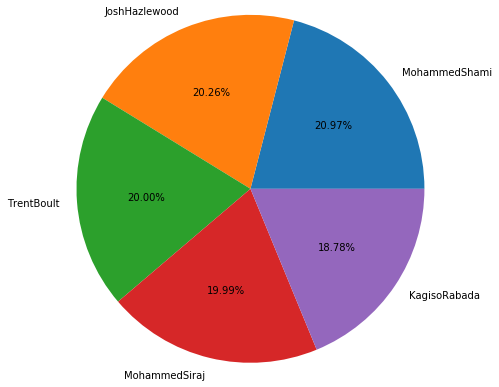

In [177]:
plt.pie(insight_8['percentage(%)'],labels=insight_8.bowlerName,autopct='%0.2f%%',radius=2)

# Top 4 teams based on past 3 years winning %.

In [83]:
df1.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [84]:
df1['winning_counts']=df1['winner'].map(df1.winner.value_counts())
df1.head()

,team1,team2,winner,margin,matchDate,match_id,winning_counts
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,25
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,21
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,21
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819,25
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942,25


In [85]:
g9=df1.groupby('winner')['winning_counts'].mean()
c9=g9.reset_index()
c9=c9.rename({'winner':'Team'}, axis=1)


In [86]:
df1['team1_counts']=df1['team1'].map(df1.team1.value_counts())
a9=df1.groupby('team1')['team1_counts'].mean()
e9=a9.reset_index()
e9=e9.rename({'team1':'Team'}, axis=1)


In [87]:
df1['team2_counts']=df1['team2'].map(df1.team2.value_counts())
b9=df1.groupby('team2')['team2_counts'].mean()
f9=b9.reset_index()
f9=f9.rename({'team2':'Team'}, axis=1)


In [88]:
g9=c9.merge(e9,on='Team',how='inner')
insight_9=g9.merge(f9,on='Team',how='inner')
insight_9

,Team,winning_counts,team1_counts,team2_counts
0,Capitals,21,16,27
1,KKR,21,18,27
2,Mumbai,20,19,25
3,Punjab Kings,19,27,15
4,RCB,25,26,19
5,Royals,22,27,18
6,Sunrisers,13,15,26
7,Super Giants,17,14,15
8,Super Kings,25,29,16
9,Titans,23,15,18


In [89]:
def func9(x,y):
    return x+y
insight_9['total_match_played']=insight_9.apply(lambda x: func9(x['team1_counts'],x['team2_counts']),axis=1)

In [90]:
insight_9.drop(['team1_counts','team2_counts'],axis=1,inplace=True)

In [91]:
insight_9

,Team,winning_counts,total_match_played
0,Capitals,21,43
1,KKR,21,45
2,Mumbai,20,44
3,Punjab Kings,19,42
4,RCB,25,45
5,Royals,22,45
6,Sunrisers,13,41
7,Super Giants,17,29
8,Super Kings,25,45
9,Titans,23,33


In [92]:
def func10(x,y):
    return (x/y)*100
insight_9['winning percentage']=insight_9.apply(lambda x: func10(x['winning_counts'],x['total_match_played']),axis=1)

In [179]:
insights_9=insight_9.nlargest(4,'winning percentage',keep='all').reset_index(drop=True)
insights_9

,Team,winning_counts,total_match_played,winning percentage
0,Titans,23,33,69.696970
1,Super Giants,17,29,58.620690
2,RCB,25,45,55.555556
3,Super Kings,25,45,55.555556


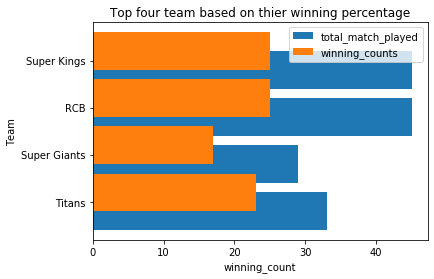

In [181]:
ypos=np.arange(len(insights_9.Team))
plt.yticks(ypos,insights_9.Team)
plt.xlabel('winning_count')
plt.ylabel('Team')
plt.title('Top four team based on thier winning percentage')
plt.barh(ypos-0.2,insights_9.total_match_played,label="total_match_played")
plt.barh(ypos+0.2,insights_9.winning_counts,label="winning_counts")
plt.legend(loc="best")

([<matplotlib.patches.Wedge at 0xc175dd0>,
 [Text(1.3423973635100492, 1.7429771422601243, 'Titans'),
  Text(-1.883098673036348, 1.1375145658886072, 'Super Giants'),
  Text(-1.2712313074086605, -1.795541969173672, 'RCB'),
  Text(1.6409151115431717, -1.4654001490068376, 'Super Kings')],
 [Text(0.7322167437327541, 0.9507148048691586, '29.11%'),
  Text(-1.0271447307470989, 0.6204624904846947, '24.48%'),
  Text(-0.6933988949501785, -0.9793865286401846, '23.20%'),
  Text(0.8950446062962754, -0.7993091721855476, '23.20%')])

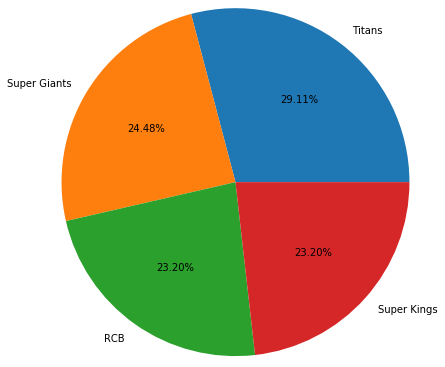

In [183]:
plt.pie(insights_9['winning percentage'],labels=insights_9.Team,autopct='%0.2f%%',radius=2)

# Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.

In [94]:
df1.head()

,team1,team2,winner,margin,matchDate,match_id,winning_counts,team1_counts,team2_counts
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,25,29,27
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,21,16,27
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,21,26,27
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819,25,16,16
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942,25,16,19


In [95]:
a10=df1[~df1.margin.str.contains("runs")]
a10

,team1,team2,winner,margin,matchDate,match_id,winning_counts,team1_counts,team2_counts
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,21,16,27
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,21,26,27
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819,25,16,16
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942,25,16,19
7,Super Kings,Punjab Kings,Punjab Kings,6 wickets,"Oct 7, 2021",T201866,19,29,15
...,...,...,...,...,...,...,...,...,...
194,Mumbai,Super Kings,Super Kings,7 wickets,"Apr 8, 2023",T206408,25,19,16
196,Sunrisers,Super Giants,Super Giants,5 wickets,"Apr 7, 2023",T209590,17,15,15
199,Capitals,Titans,Titans,6 wickets,"Apr 4, 2023",T205026,23,16,18
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485,25,19,19


In [96]:
a10['chasing_winner_count']=a10.winner.map(a10.winner.value_counts())
b10=a10.groupby('winner')['chasing_winner_count'].mean()
df_10=pd.DataFrame(b10).reset_index()
df_10=df_10.rename({'winner':'teams'}, axis=1)
df_10



,teams,chasing_winner_count
0,Capitals,14
1,KKR,14
2,Mumbai,13
3,Punjab Kings,8
4,RCB,11
5,Royals,9
6,Sunrisers,9
7,Super Giants,6
8,Super Kings,11
9,Titans,14


In [185]:
insights_10=df_10.nlargest(2,'chasing_winner_count',keep='all').reset_index(drop=True)
insights_10

,teams,chasing_winner_count
0,Capitals,14
1,KKR,14
2,Titans,14


([<matplotlib.patches.Wedge at 0xc2eba90>,
 [Text(0.8249999554042673, 1.4289419419916813, 'Capitals'),
  Text(-1.649999999999993, -1.5448414887097505e-07, 'KKR'),
  Text(0.8250002229786528, -1.4289417875075154, 'Titans')],
 [Text(0.4499999756750548, 0.7794228774500078, '33.3%'),
  Text(-0.899999999999996, -8.426408120235001e-08, '33.3%'),
  Text(0.45000012162471964, -0.7794227931859175, '33.3%')])

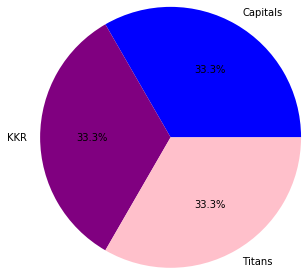

In [189]:
plt.pie(insights_10.chasing_winner_count,labels=insights_10.teams,colors=['blue','purple','pink'],autopct='%0.1f%%',radius=1.5)

# Insights derived from this analysis

1.Top 10 batsmen based on past 3 years total runs scored. 
2. Top 10 batsmen based on past 
3 years batting average. (min 60 balls faced in each season) 
4. Top 10 bowlers based on past 3 years total wickets taken. 
5. Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season) 
6. Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season) 
7. Top 5 batsmen based on past 3 years boundary % (fours and sixes)
8. Top 5 bowlers based on past 3 years dot ball %
9. Top 4 teams based on past 3 years winning %.
10.Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.